In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.interpolate import interp1d
import numpy as np

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

# Introduction
Python has emerged as a versatile and indispensable programming language in the field of engineering, revolutionizing the way engineers approach problem-solving, analysis, and simulation. With its simple and readable syntax, extensive library ecosystem, and robust community support, Python has become a go-to choice for engineers across various disciplines. Whether it's designing complex systems, optimizing processes, conducting simulations, or visualizing data, Python's flexibility and accessibility empower engineers to tackle intricate challenges efficiently and creatively. In this ever-evolving digital age, Python continues to play a pivotal role in advancing engineering practices, making it an essential tool for modern engineers seeking to innovate and excel in their endeavors.

With this in mind, here are some key packages/tools that engineers use to achieve their goals:


* Pandas:
    * Purpose: Pandas is a powerful data manipulation and analysis library. It provides data structures and functions for working with structured data, such as spreadsheets or SQL tables.
    * Key Features: DataFrames and Series for data representation, data cleaning and preparation, data filtering, grouping, aggregation, and more.
    * Use Cases: Data cleaning, exploration, and analysis. It's widely used in data science and machine learning projects.
* SciPy:
    * Purpose: SciPy is an open-source library used for scientific and technical computing. It builds on the capabilities of NumPy and provides additional functionality for optimization, integration, interpolation, and more.
    * Key Features: Integration, optimization, interpolation, linear algebra, statistical functions, and more.
    * Use Cases: Numerical simulations, scientific experiments, engineering calculations, and more.
* SymPy:
    * Purpose: SymPy is a Python library for symbolic mathematics. It allows you to perform algebraic operations symbolically, making it useful for symbolic math problems and symbolic equation manipulation.
    * Key Features: Symbolic algebra, calculus, equation solving, and equation simplification.
    * Use Cases: Symbolic mathematics, calculus, algebraic manipulation, and mathematical problem-solving.
* Matplotlib:
    * Purpose: Matplotlib is a popular data visualization library for creating static, animated, and interactive visualizations in Python. It provides a wide range of plotting options and customization.
    * Key Features: Line plots, scatter plots, bar plots, histograms, 3D plots, and more.
    * Use Cases: Data visualization, exploration, and presentation in scientific, engineering, and data analysis projects.
* Jupyter:
    * Purpose: Jupyter is a project that provides interactive computing environments for various programming languages, including Python. Jupyter Notebook and JupyterLab are the most widely used interfaces.
    * Key Features: Interactive code cells, support for multiple programming languages, data visualization, and narrative text in documents.
    * Use Cases: Data analysis, data exploration, research, scientific computing, and creating data-driven documents.

These libraries are fundamental tools for data science, scientific computing, and technical research in Python. They each serve specific purposes and can often be used together to perform end-to-end data analysis and scientific computation tasks. Jupyter notebooks are particularly useful for creating interactive and shareable documents that combine code, visualizations, and explanations.

# Examples
The following examples are provided for gaining a better understanding of how python can be used in engineering or engineering classes.

---
Example: Plot the stress and strain data from the `tensile_test.xlsx` file for specimen 1. The specimen had an original gauge length of 65 mm, with of 6.92 mm, and thickness of 2.27 mm.

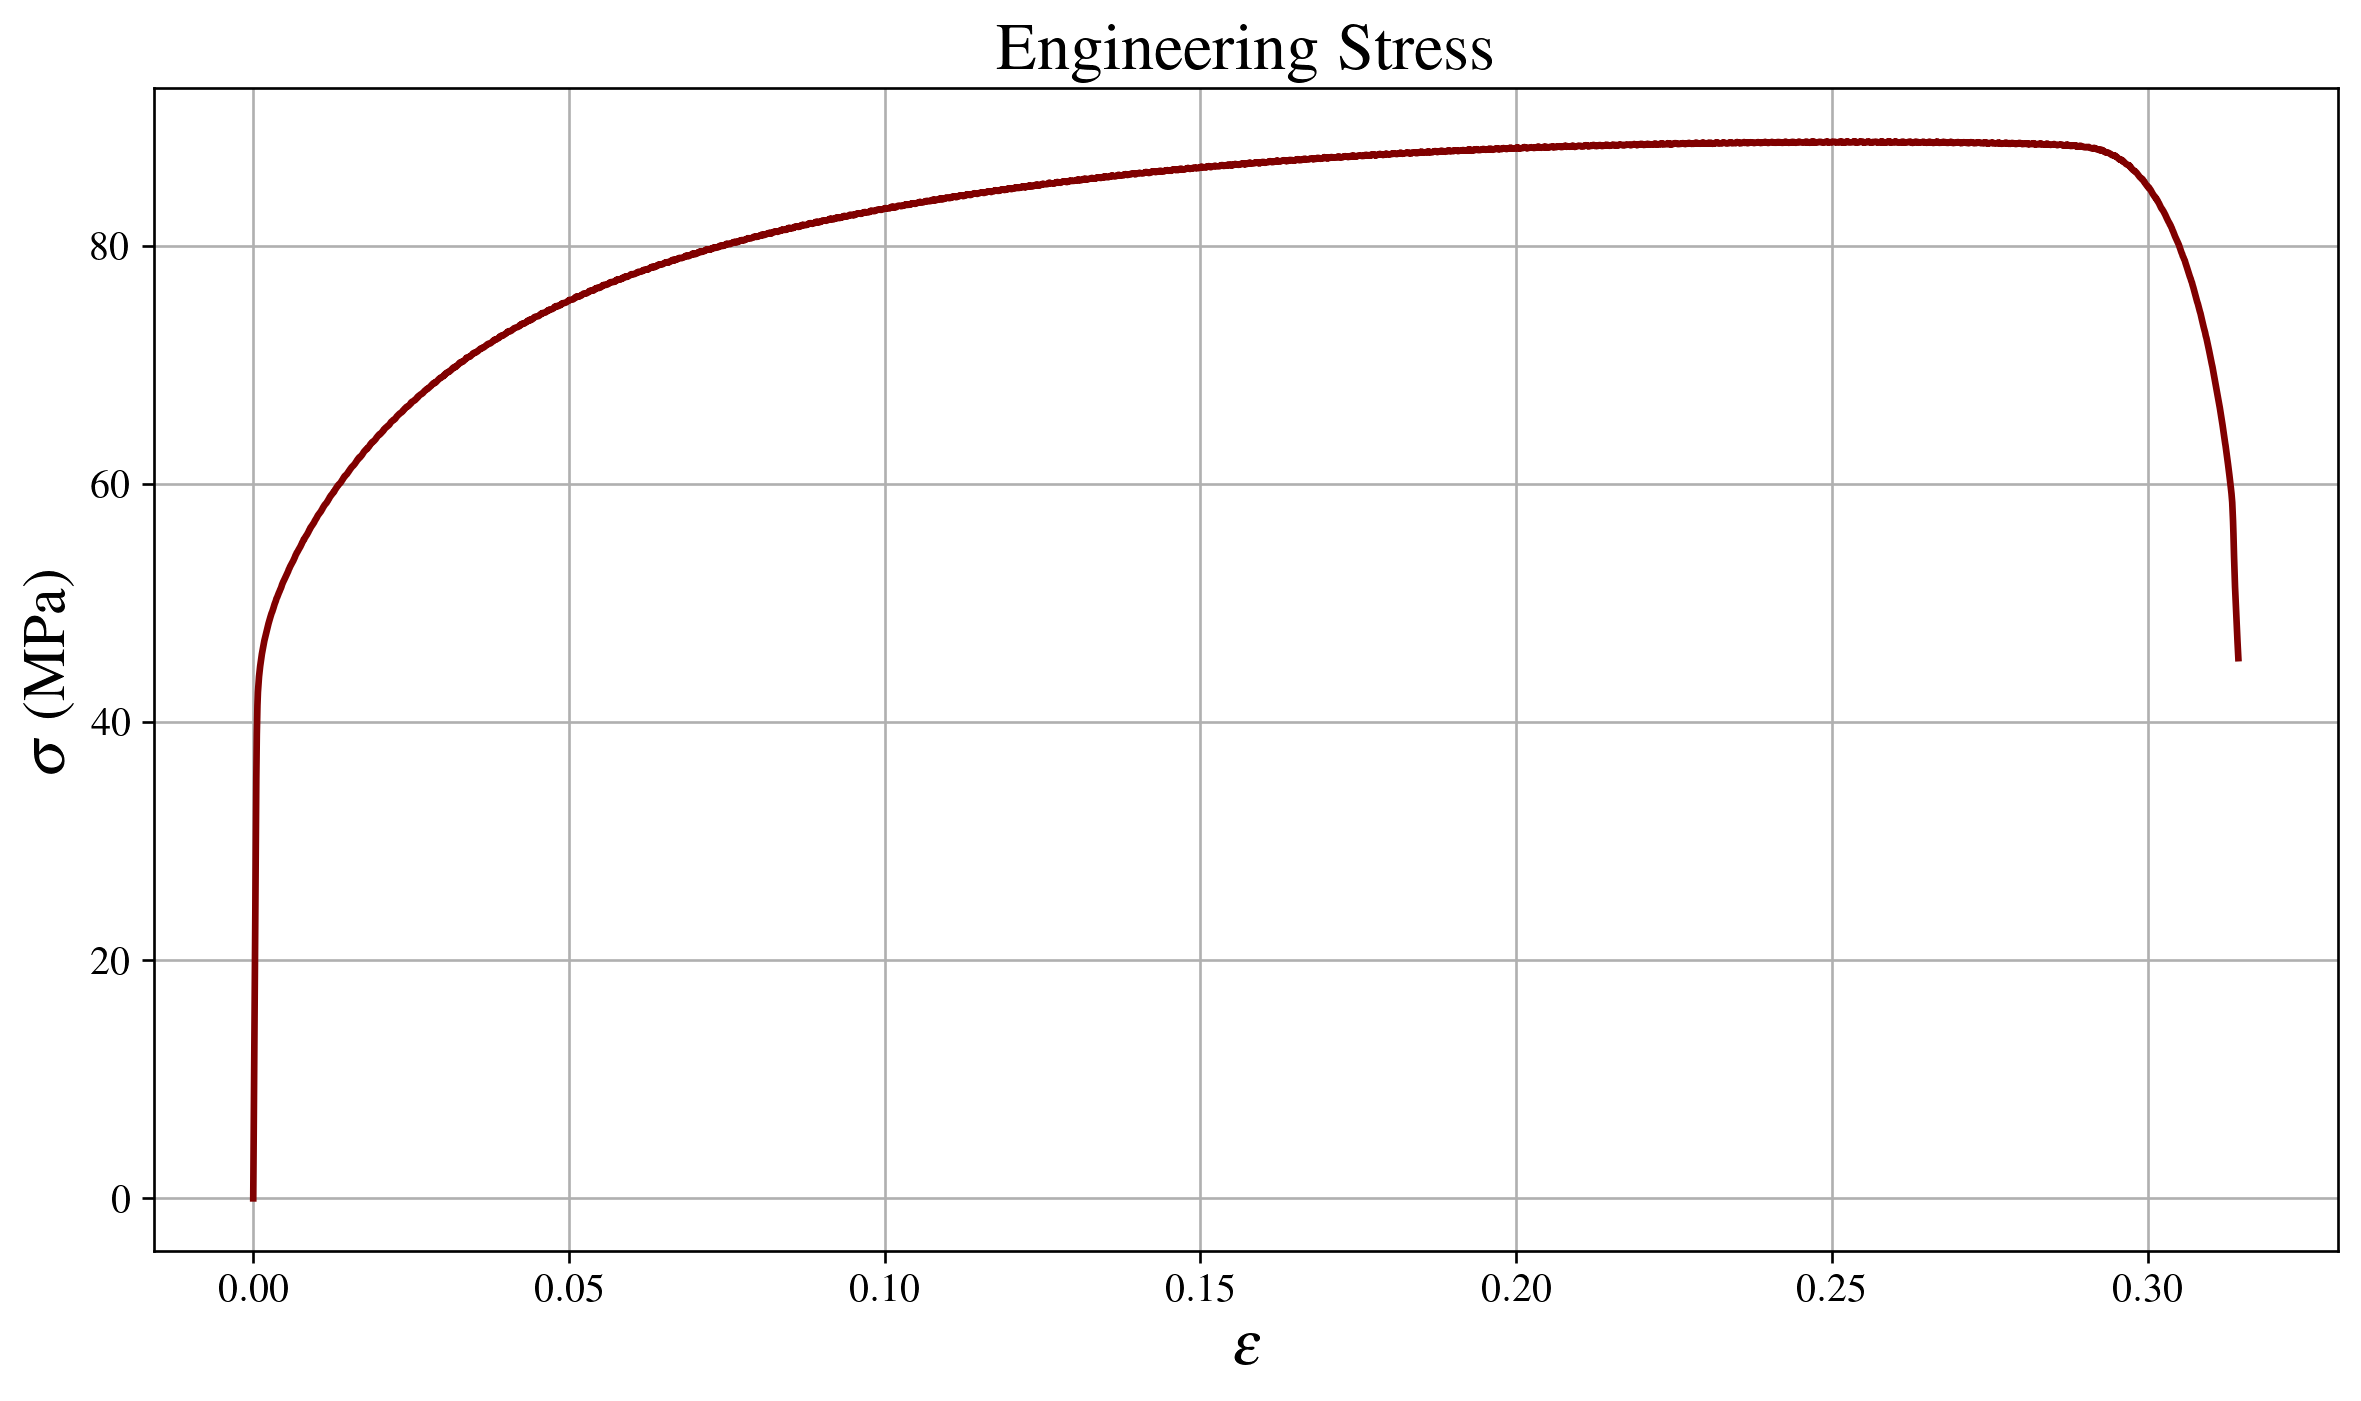

In [2]:
data = pd.read_excel('tensile_test.xlsx', sheet_name="Specimen 1")  # might need to pip install openpyxl

L = 65  # mm
w, t = 6.92, 2.27  # mm

strain = data['Displacement']/L
stress = data['Load']/(w*t)  # MPa

fig, ax = plt.subplots()
ax.plot(strain, stress)
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\sigma$ (MPa)')
ax.set_title('Engineering Stress')
# fig.savefig('Specimen 1 Stress.png')
plt.show()

---
Example: Find a solution to the non-linear system of equations using `fsolve`.

$$\begin{cases}
x^2+y^2=25 \\
xy=10
\end{cases}$$

In [3]:
# The function needs to return a value or list of values that should be zero
def func(x_array):
    x_, y_ = x_array
    return [
        x_**2 + y_**2 - 25,
        x_*y_ - 10
    ]

sol = fsolve(func, np.array([0, 0]))
sol

array([2.23606798, 4.47213596])

In [4]:
func(sol)  # Really small numbers (zero)

[9.77152581072005e-10, 1.339781618980851e-10]

---
Example: Create an interpolation function that goes through the points `x=[1, 2, 3, 4, 5]`, `y=[2, 3, 9, 10, 5]` and plot the result.

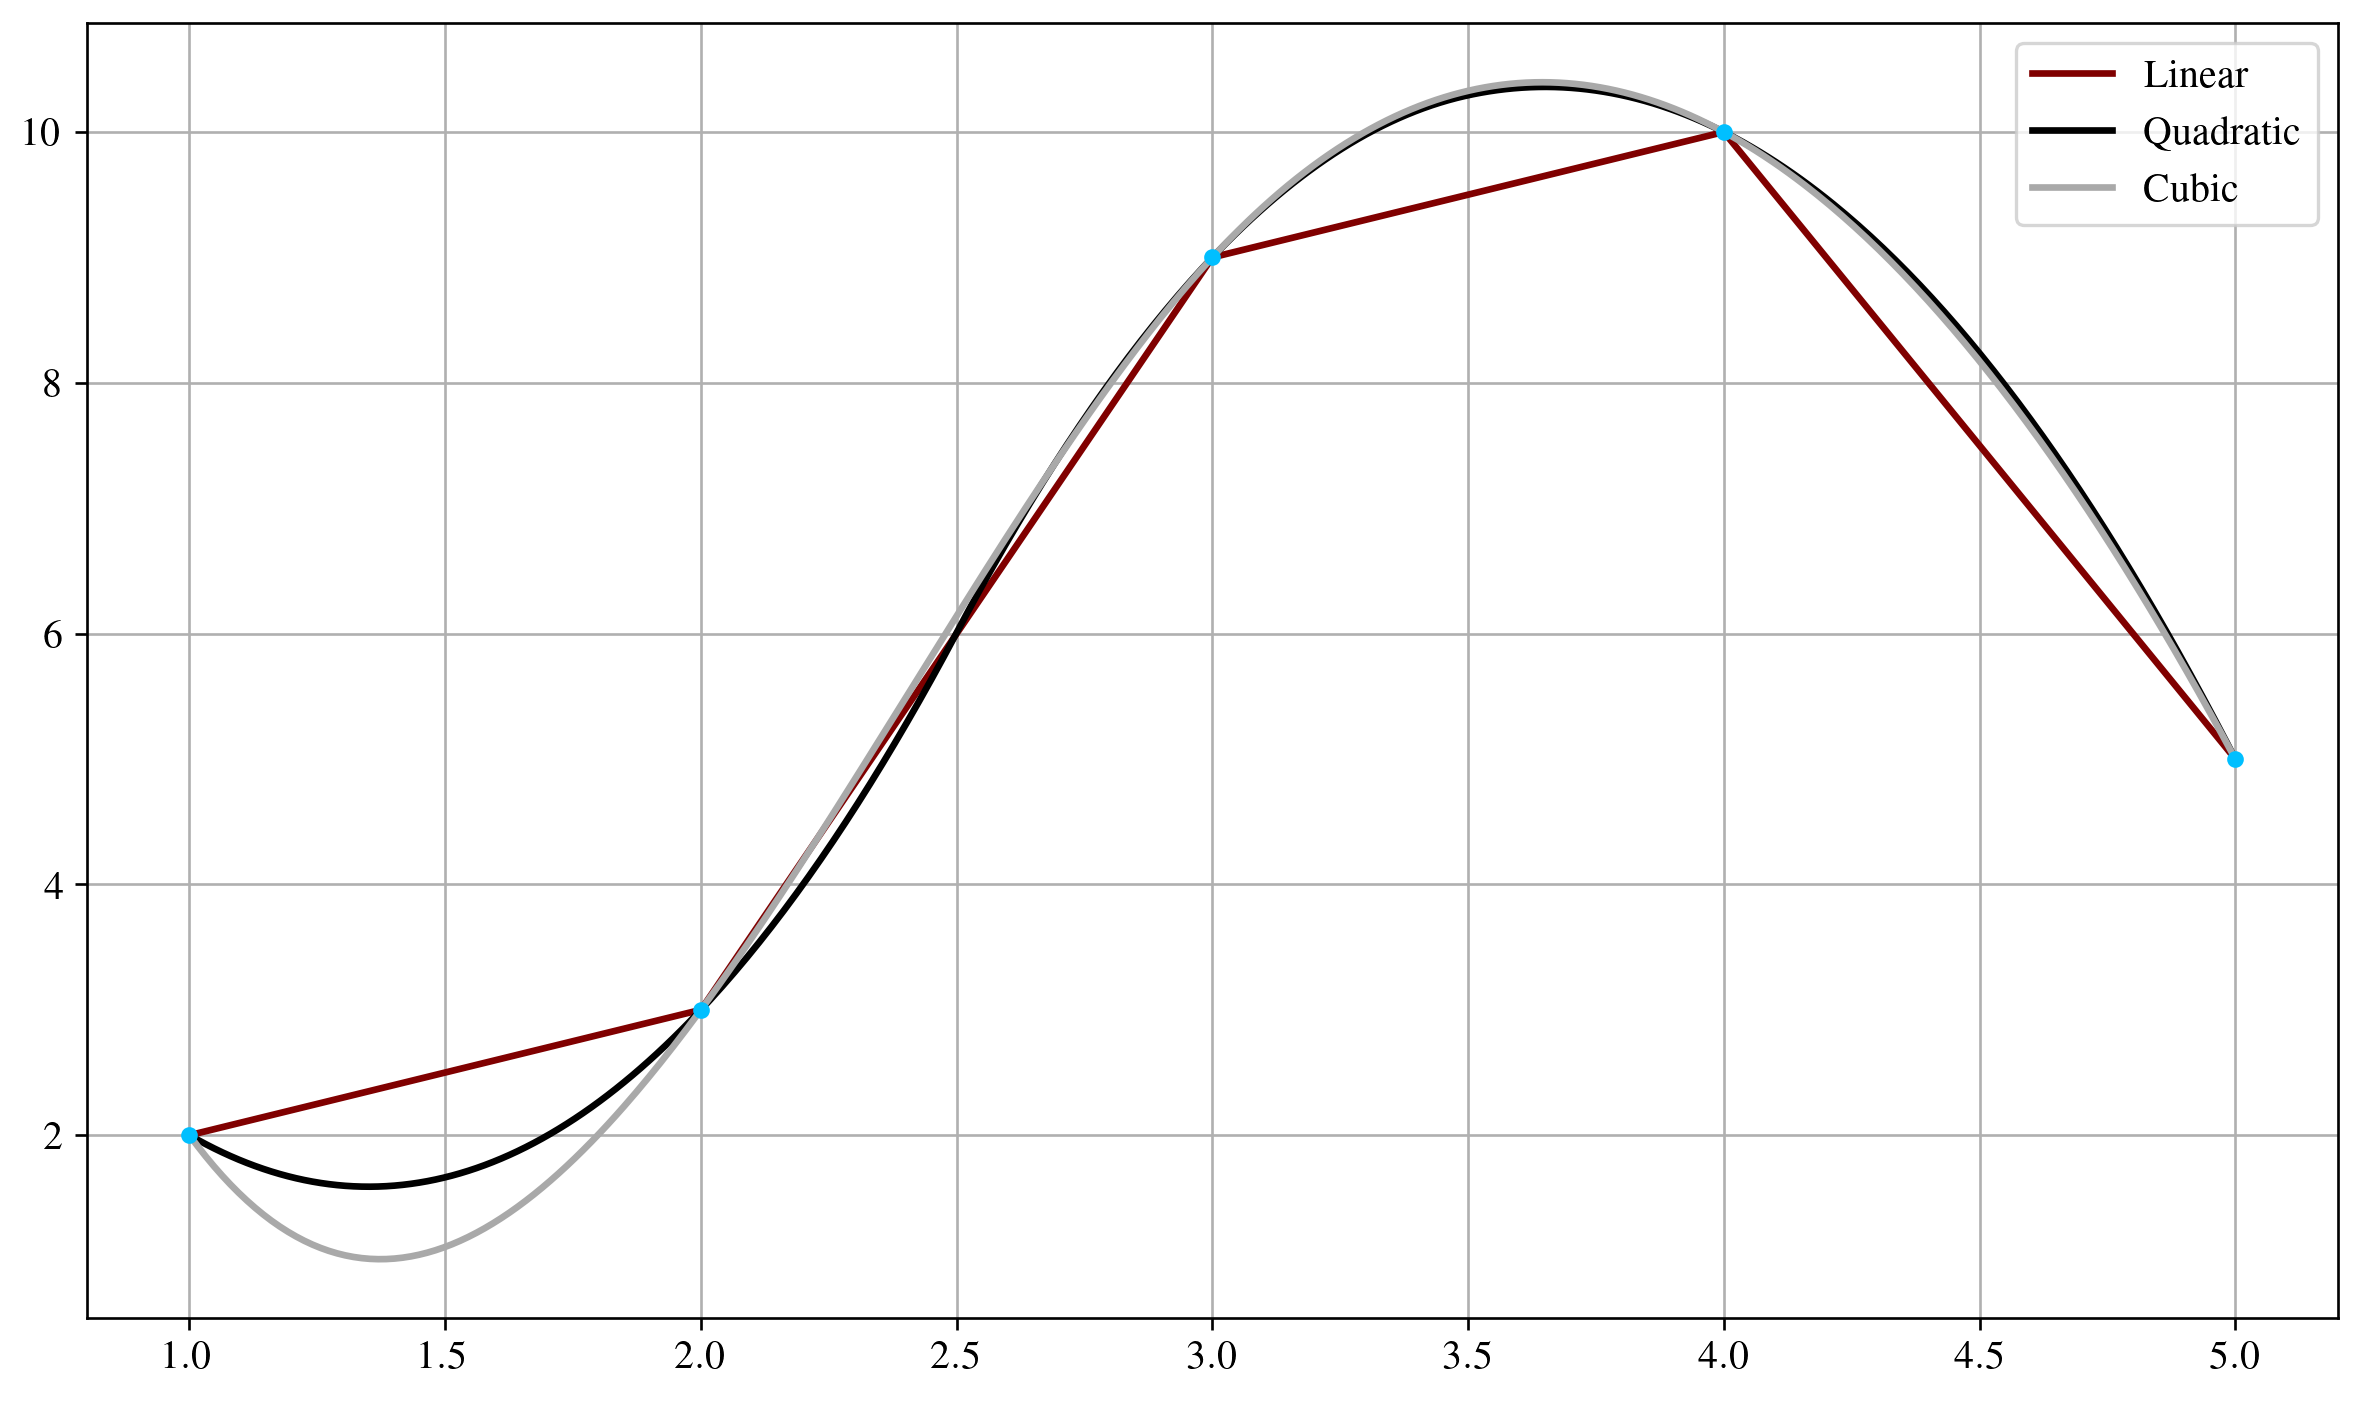

In [5]:
x = range(1, 6)
y = [2, 3, 9, 10, 5]

f1 = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')

x_fine = np.linspace(x[0], x[-1], 500)

fig, ax = plt.subplots()
ax.scatter(x, y, color='deepskyblue', marker='.', zorder=3)
ax.plot(x_fine, f1(x_fine), label='Linear', zorder=2)
ax.plot(x_fine, f2(x_fine), label='Quadratic', zorder=2)
ax.plot(x_fine, f3(x_fine), label='Cubic', zorder=2)
ax.legend()
plt.show()

---
Example: Curve fit the data in the `data.csv` file for both a linear regression in the linear data column and an exponential regression in the exponential data column. The exponential form is $Ae^{Bx}$.

m, b: [1.95055881 3.4375196 ]
A, B: [3.31213966 0.08917753]


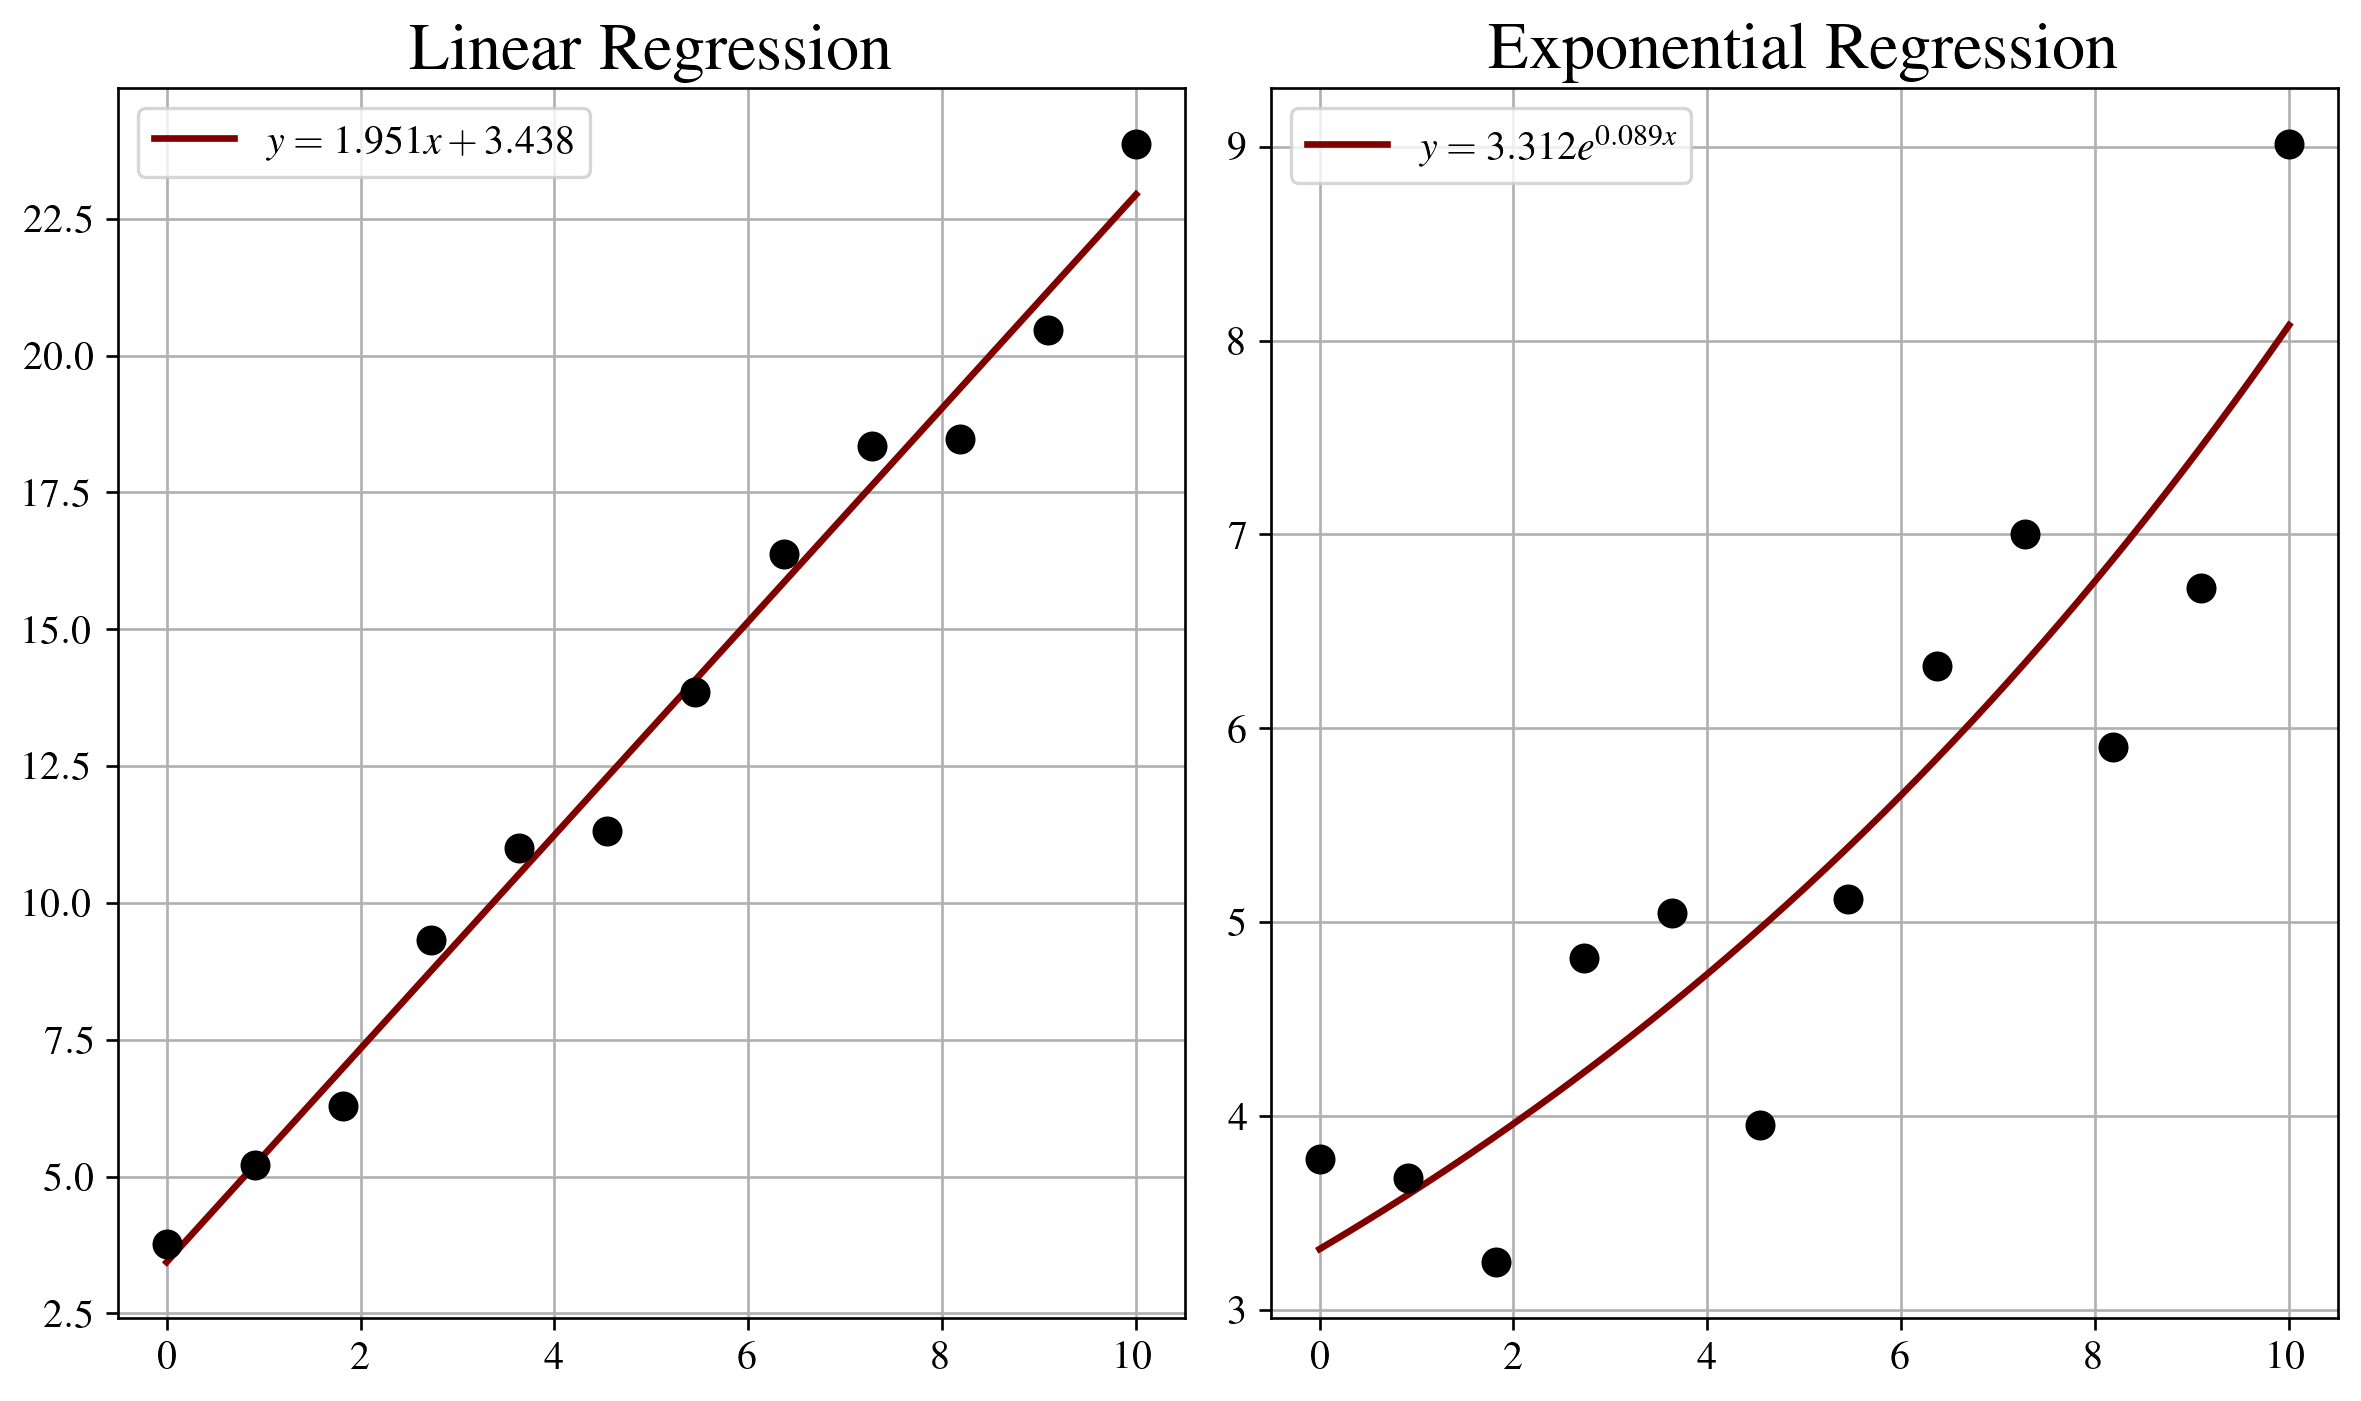

In [6]:
data = pd.read_csv('data.csv')
x, y_lin, y_exp = np.array(data['x']), np.array(data['linear']), np.array(data['exponential'])

lin_reg = lambda x_, m, b: m*x_ + b
exp_reg = lambda x_, A, B: A*np.exp(B*x_)

popt1, _ = curve_fit(lin_reg, x, y_lin)
popt2, _ = curve_fit(exp_reg, x, y_exp)

print(f'm, b: {popt1}')
print(f'A, B: {popt2}')

x_fine = np.linspace(x[0], x[-1], 500)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].set_title('Linear Regression')
ax[0].scatter(x, y_lin, zorder=3, color='black')
ax[0].plot(x_fine, lin_reg(x_fine, *popt1), zorder=2, label=f'$y={popt1[0]:.3f}x+{popt1[1]:.3f}$')
ax[0].legend()

ax[1].set_title('Exponential Regression')
ax[1].scatter(x, y_exp, zorder=3, color='black')
ax[1].plot(x_fine, exp_reg(x_fine, *popt2), zorder=2, label=f'$y={popt2[0]:.3f}e^{{{popt2[1]:.3f}x}}$')
ax[1].legend()

plt.show()